In [1]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

# matplotlib.use('Agg')

WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9

# left, up, right, down
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
ACTIONS_FIGS=[ '←', '↑', '→', '↓']

ACTION_PROB = 0.25


def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5

    next_state = (np.array(state) + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward


def draw_image(image):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(image):

        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')
        

    # Row and column labels...
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')

    ax.add_table(tb)

    return fig

def draw_policy(optimal_values):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = optimal_values.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(optimal_values):
        next_vals=[]
        for action in ACTIONS:
            next_state, _ = step([i, j], action)
            next_vals.append(optimal_values[next_state[0],next_state[1]])

        best_actions=np.where(next_vals == np.max(next_vals))[0]
        val=''
        for ba in best_actions:
            val+=ACTIONS_FIGS[ba]
        
        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val,
                loc='center', facecolor='white')

    # Row and column labels...
    for i in range(len(optimal_values)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                   edgecolor='none', facecolor='none')

    ax.add_table(tb)
    
    return fig

In [2]:
value = np.zeros((WORLD_SIZE, WORLD_SIZE))
while True:
    # keep iteration until convergence
    new_value = np.zeros_like(value)
    for i in range(WORLD_SIZE):
        for j in range(WORLD_SIZE):
            for action in ACTIONS:
                (next_i, next_j), reward = step([i, j], action)
                # bellman equation
                new_value[i, j] += ACTION_PROB * (reward + DISCOUNT * value[next_i, next_j])
    if np.sum(np.abs(value - new_value)) < 1e-4:
        
        # plt.savefig('../images/figure_3_2.png')
        # plt.close()
        break
    value = new_value

In [17]:
fig = draw_image(np.round(new_value, decimals=2))

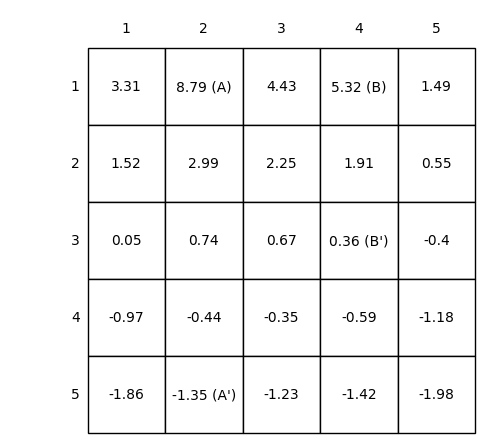

In [3]:
image = np.round(new_value, decimals=2)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_axis_off()
tb = Table(ax, bbox=[0, 0, 1, 1])

nrows, ncols = image.shape
width, height = 1.0 / ncols, 1.0 / nrows

# Add cells
for (i, j), val in np.ndenumerate(image):

    # add state labels
    if [i, j] == A_POS:
        val = str(val) + " (A)"
    if [i, j] == A_PRIME_POS:
        val = str(val) + " (A')"
    if [i, j] == B_POS:
        val = str(val) + " (B)"
    if [i, j] == B_PRIME_POS:
        val = str(val) + " (B')"
    
    tb.add_cell(i, j, width, height, text=val,
                loc='center', facecolor='white')
    

# Row and column labels...
for i in range(len(image)):
    tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                edgecolor='none', facecolor='none')
    tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                edgecolor='none', facecolor='none')

ax.add_table(tb)


In [4]:
(1/4 * (-1 + np.array([0, -1, -1, -1]))).sum()

-1.75